In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df.shape

(506, 15)

In [11]:
X_df = df.drop(['Unnamed: 0', 'medv'], axis=1).values
y_df = df['medv'].values.reshape(-1,1)

In [15]:
print(X_df.shape)
print(y_df.shape)

(506, 13)
(506, 1)


In [12]:
np.random.seed(20)
indices = np.arange(X_df.shape[0])
np.random.shuffle(indices)

In [16]:
X_df = X_df[indices]
y_df = y_df[indices]

In [17]:
split = int(0.8 * X_df.shape[0])
X_train, X_test = X_df[:split], X_df[split:]
y_train, y_test = y_df[:split], y_df[split:]

In [18]:
def remove_outliers_iqr(X, y, factor=7):
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    mask = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)
    return X[mask], y[mask]

In [19]:

X_train, y_train = remove_outliers_iqr(X_train, y_train)

In [20]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1.0
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


In [21]:
X_train, X_mu, X_sigma = zscore_normalize_features(X_train)
X_test = (X_test - X_mu) / X_sigma

In [22]:
def pca(X, n_components=1):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    components = eigenvectors[:, sorted_idx][:, :n_components]
    X_reduced = np.dot(X_centered, components)
    return X_reduced, components

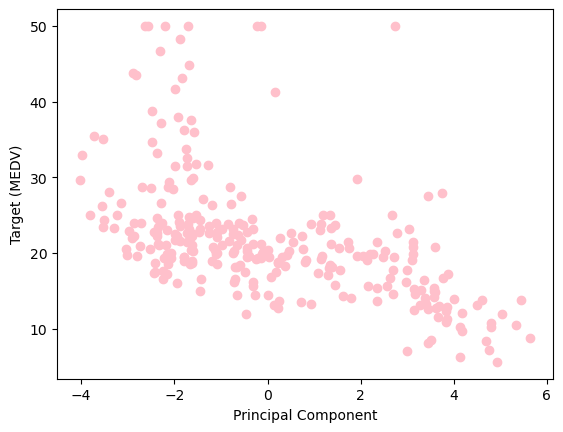

In [24]:
X_pca, _ = pca(X_train)
plt.scatter(X_pca.flatten(), y_train.flatten(), color='pink')
plt.xlabel("Principal Component")
plt.ylabel("Target (MEDV)")
plt.show()

In [25]:
m, n = X_train.shape
w = np.random.randn(n,1)*0.01
b = np.random.randn()*0.01
lambd = 0.5

In [26]:
def compute_cost(X, y, w, b, lambd):
    m = X.shape[0]
    errors = np.dot(X, w) + b - y
    cost = np.sum(errors**2)/(2*m) + (lambd/(2*m))*np.dot(w.T, w).item()
    return cost

In [27]:
def compute_gradient(X, y, w, b, lambd):
    m = X.shape[0]
    errors = np.dot(X, w) + b - y
    dj_dw = np.dot(X.T, errors)/m + (lambd/m)*w
    dj_db = np.sum(errors)/m
    return dj_db, dj_dw

In [29]:
def gradient_descent(X, y, w, b, alpha, num_iters, lambd):
    J_history = []
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b, lambd)
        w -= alpha*dj_dw
        b -= alpha*dj_db
        if i<100000:
            J_history.append(compute_cost(X, y, w, b, lambd))
    return w, b, J_history

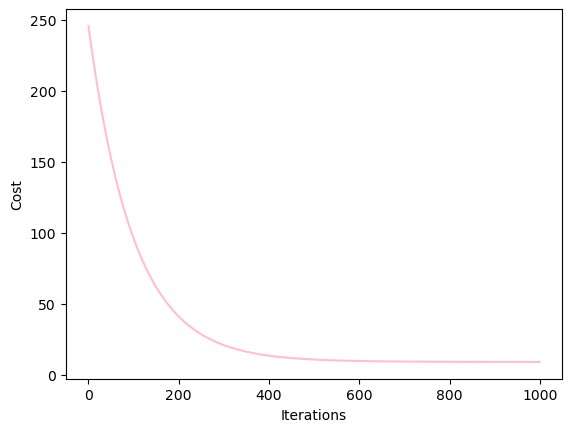

In [31]:
iterations = 1000
alpha = 0.005
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w, b, alpha, iterations, lambd)

plt.plot(J_hist,color='pink')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


In [32]:
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_res = np.sum((y_true - y_pred)**2)
    return 1 - ss_res/ss_total

y_pred_train = np.dot(X_train, w_final) + b_final
y_pred_test = np.dot(X_test, w_final) + b_final

print("R2 Train:", r_squared(y_train.flatten(), y_pred_train.flatten()))
print("R2 Test:", r_squared(y_test.flatten(), y_pred_test.flatten()))

R2 Train: 0.7359166687283171
R2 Test: 0.7389918722501014


In [33]:
feature_names = df.drop(['Unnamed: 0', 'medv'], axis=1).columns

print(f"{'Feature':<10} {'Coefficient':>12}")
print("-"*25)
for name, coef in zip(feature_names, w_final.flatten()):
    print(f"{name:<10} {coef:>12.4f}")

print(f"{'Intercept':<10} {b_final:>12.4f}")


Feature     Coefficient
-------------------------
crim            -0.8068
zn               0.4687
indus           -0.3478
chas            -0.0093
nox             -1.0987
rm               2.9123
age             -0.6727
dis             -2.5983
rad              1.7443
tax             -1.4007
ptratio         -2.1076
black           -0.1435
lstat           -3.0088
Intercept       21.7126


In [34]:
r2_train = r_squared(y_train.flatten(), y_pred_train.flatten())
r2_test = r_squared(y_test.flatten(), y_pred_test.flatten())